In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

https://stackoverflow.com/questions/77714128/how-to-perform-a-chi-square-test-of-two-curves-while-considering-their-x-values

In [2]:
def model(x, scale=1., loc=0.):
    return stats.logistic.pdf(x, scale=scale, loc=loc)

In [3]:
np.random.seed(12345)
x0 = np.linspace(-3, 3, 200)
x1 = x0 * 0.5  + 1.
p0 = (1, 0)
y = model(x0, *p0)
s = 0.01 * np.ones_like(y)
n =  s * np.random.normal(size=y.size)
yn = y + n

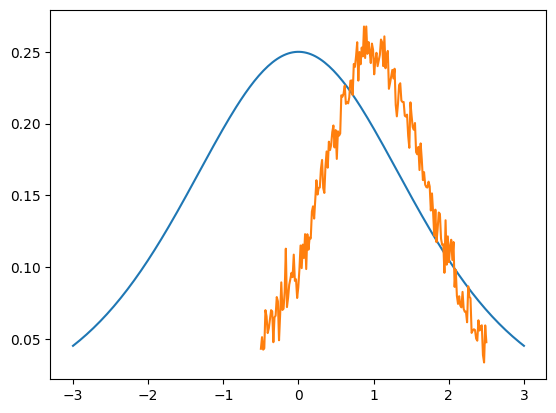

In [4]:
fig, axe = plt.subplots()
axe.plot(x0, y)
axe.plot(x1, yn)

In [5]:
def adapted_model(x, scale, loc):
    x0 = (x - loc) / scale
    return model(x0, *p0)

In [6]:
popt, pcov = optimize.curve_fit(adapted_model, x1, yn)

In [7]:
popt, pcov

(array([0.49942115, 1.00164685]),
 array([[8.90571634e-06, 9.12807740e-09],
        [9.12807740e-09, 2.42234627e-05]]))

In [8]:
yhat = adapted_model(x1, *popt)

In [12]:
nu = yn.size - 2
chi2 = np.sum(((yn - yhat) / s)**2)
chi2n = chi2/nu
chi2, chi2n

(200.54962445657532, 1.012876891194825)

In [16]:
pvalue = stats.chi2(df=nu).sf(chi2)
pvalue

0.436026536860545

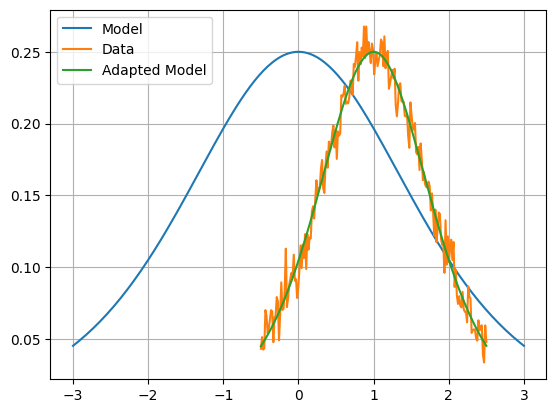

In [10]:
fig, axe = plt.subplots()
axe.plot(x0, y, label="Model")
axe.plot(x1, yn, label="Data")
axe.plot(x1, yhat, label="Adapted Model")
axe.legend()
axe.grid()